In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display
import time
import os
import torchvision.models as models
import torchvision.transforms as transforms
import torch
os.environ["http_proxy"] = "http://proxy.uec.ac.jp:8080/"
os.environ["https_proxy"] = "http://proxy.uec.ac.jp:8080/"

(256, 256, 3)


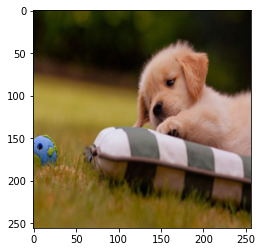

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
real = np.array(Image.open('./dog.jpg').resize((256,256)))
plt.imshow(real)
print(real.shape)
plt.show()

(368, 368, 3)


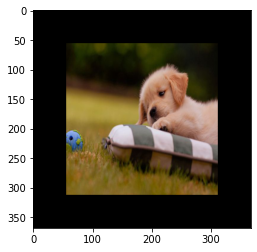

In [3]:
img_sub = np.pad(real,((56,56),(56,56),(0,0)),'constant',constant_values=(0,0))
print(img_sub.shape)
plt.imshow(img_sub)

(368, 368, 3)


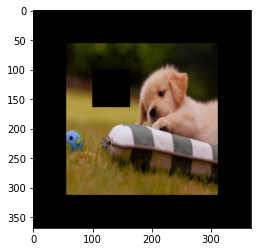

In [4]:
mask = np.array([0]*12288).reshape((64,64,3))
mask = np.pad(mask,((100,204),(100,204),(0,0)),'constant',constant_values=(1,1)) # 304
print(mask.shape)
new = img_sub*mask
plt.imshow(new)

(256, 256, 3)


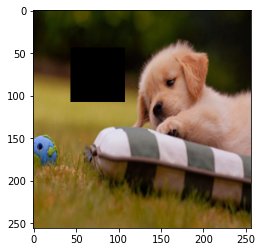

In [5]:
res_new = new[56:-56,56:-56,:]
print(res_new.shape)
plt.imshow(res_new)

In [6]:
pre = Image.fromarray(np.uint8(res_new))

In [7]:
image_size = (224, 224) 
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
image_transform = transforms.Compose([transforms.Resize(image_size),transforms.ToTensor(),normalize])
pre = image_transform(pre).unsqueeze(0)

In [8]:
vgg16 = models.vgg16(pretrained=True,progress=True)
softmax=torch.nn.Softmax(dim=1)
SYNSET_FILE='1000.txt'  # ImageNet1000 種類のカテゴリ名が書かれたファイル．
synset=open(SYNSET_FILE).read().split('\n')

In [9]:
################################
#######get label index##########
################################
vgg16.eval()
with torch.no_grad():
    out=softmax(vgg16(pre)).numpy()[0]
top5=np.sort(out)[:-6:-1]
print(top5)
top5idx=np.argsort(out)[:-6:-1] 
print(top5idx)
for i in range(5):
    print("[%d] index= %s,%.8f %s" % (i+1,top5idx[i],top5[i],synset[top5idx[i]]))

[0.9347668  0.01798576 0.01170045 0.00620688 0.00489352]
[207 208 222 176 257]
[1] index= 207,0.93476683 n02099601 golden retriever
[2] index= 208,0.01798576 n02099712 Labrador retriever
[3] index= 222,0.01170045 n02104029 kuvasz
[4] index= 176,0.00620688 n02091831 Saluki, gazelle hound
[5] index= 257,0.00489352 n02111500 Great Pyrenees


In [11]:
print(synset[63])
print(synset[393])
print(synset[479])
print(synset[282])
print(synset[207])

n01748264 Indian cobra, Naja naja
n02607072 anemone fish
n02974003 car wheel
n02123159 tiger cat
n02099601 golden retriever
